In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv("mushrooms.csv") 

In [113]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

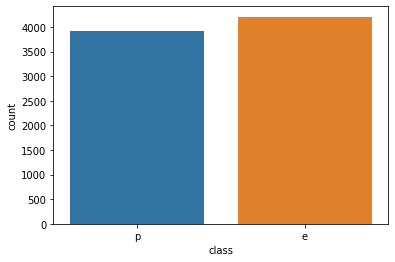

In [114]:
sns.countplot(data=df,x='class')

In [115]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [116]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


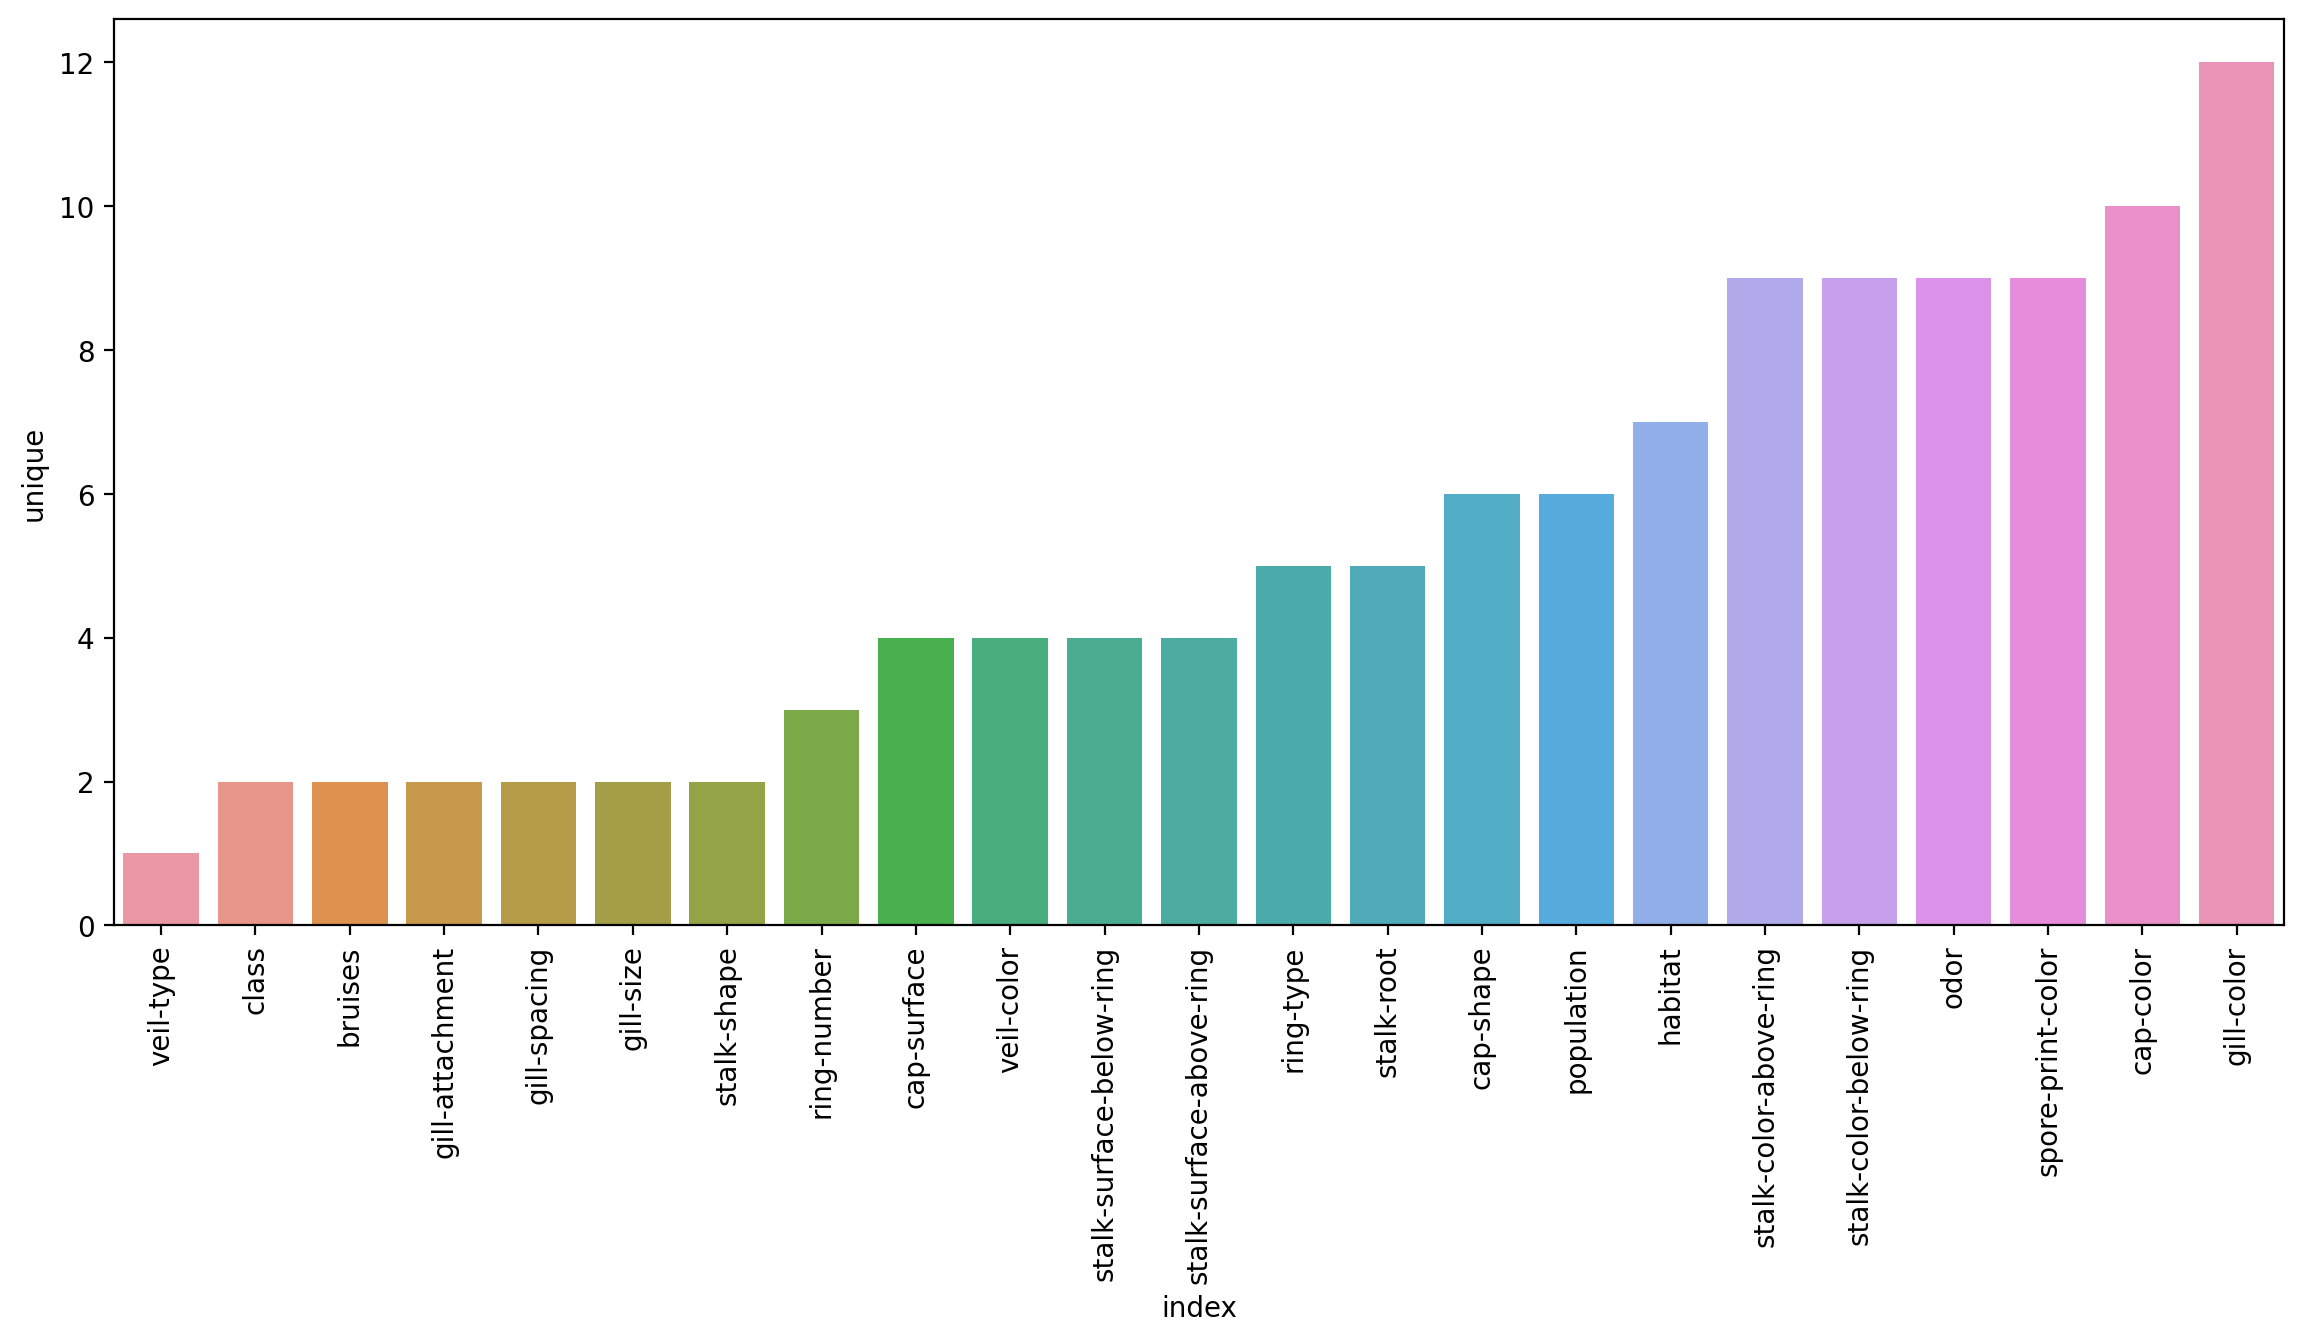

In [117]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [118]:
X = df.drop('class',axis=1)

In [119]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [120]:
X = pd.get_dummies(X,drop_first=True)

In [121]:
y=df['class']

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
model = AdaBoostClassifier(n_estimators=18)

In [126]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [127]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [128]:
predictions = model.predict(X_test)

In [129]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [130]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [131]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.05555556, 0.05555556,
       0.        , 0.        , 0.11111111, 0.05555556, 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

будет найдена только одна фича потому что мы выбрали количество естимейтов 1 

внизу команда чтобы узнать индекс этой фичи 

In [132]:
model.feature_importances_.argmax()

28

In [133]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

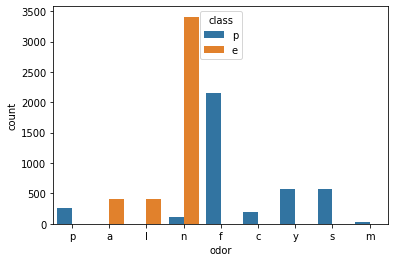

In [134]:
sns.countplot(data=df,x='odor',hue='class')

In [135]:
len(X.columns)

95

Проведя мододелирование по одной колонке мы увидили что наша модель принимающая во внимание только колонку 22 имеет точность предсказания 88 процентов 


далее методом перебора мы попробуем увидить как повлияет количество естимейторов на увеличесние или уменьшение ошибок при прмиенении модели 

In [136]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

In [137]:
error_rates

[0.12223133716160783,
 0.12223133716160783,
 0.09515996718621822,
 0.0459392945036915,
 0.031173092698933536,
 0.052502050861361726,
 0.020508613617719496,
 0.018867924528301883,
 0.012305168170631653,
 0.003281378178835115,
 0.003281378178835115,
 0.008203445447087732,
 0.003281378178835115,
 0.001640689089417502,
 0.001640689089417502,
 0.001640689089417502,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

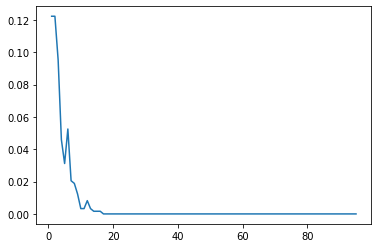

In [138]:
plt.plot(range(1,96),error_rates)

на графике мы видим что после 20 естиметоров(показателей по которым строится модель) уровень ошибки становится 0 

In [139]:
model

AdaBoostClassifier(n_estimators=18)

In [140]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.05555556, 0.05555556,
       0.        , 0.        , 0.11111111, 0.05555556, 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [141]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [142]:
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [143]:
imp_feats = feats[feats['Importance']>0]

In [144]:
imp_feats

,Importance
bruises_t,0.055556
odor_c,0.055556
odor_f,0.055556
odor_n,0.111111
odor_p,0.055556
gill-size_n,0.166667
stalk-surface-above-ring_k,0.055556
stalk-surface-below-ring_y,0.055556
stalk-color-below-ring_n,0.055556
spore-print-color_r,0.055556


In [145]:
imp_feats = imp_feats.sort_values("Importance")

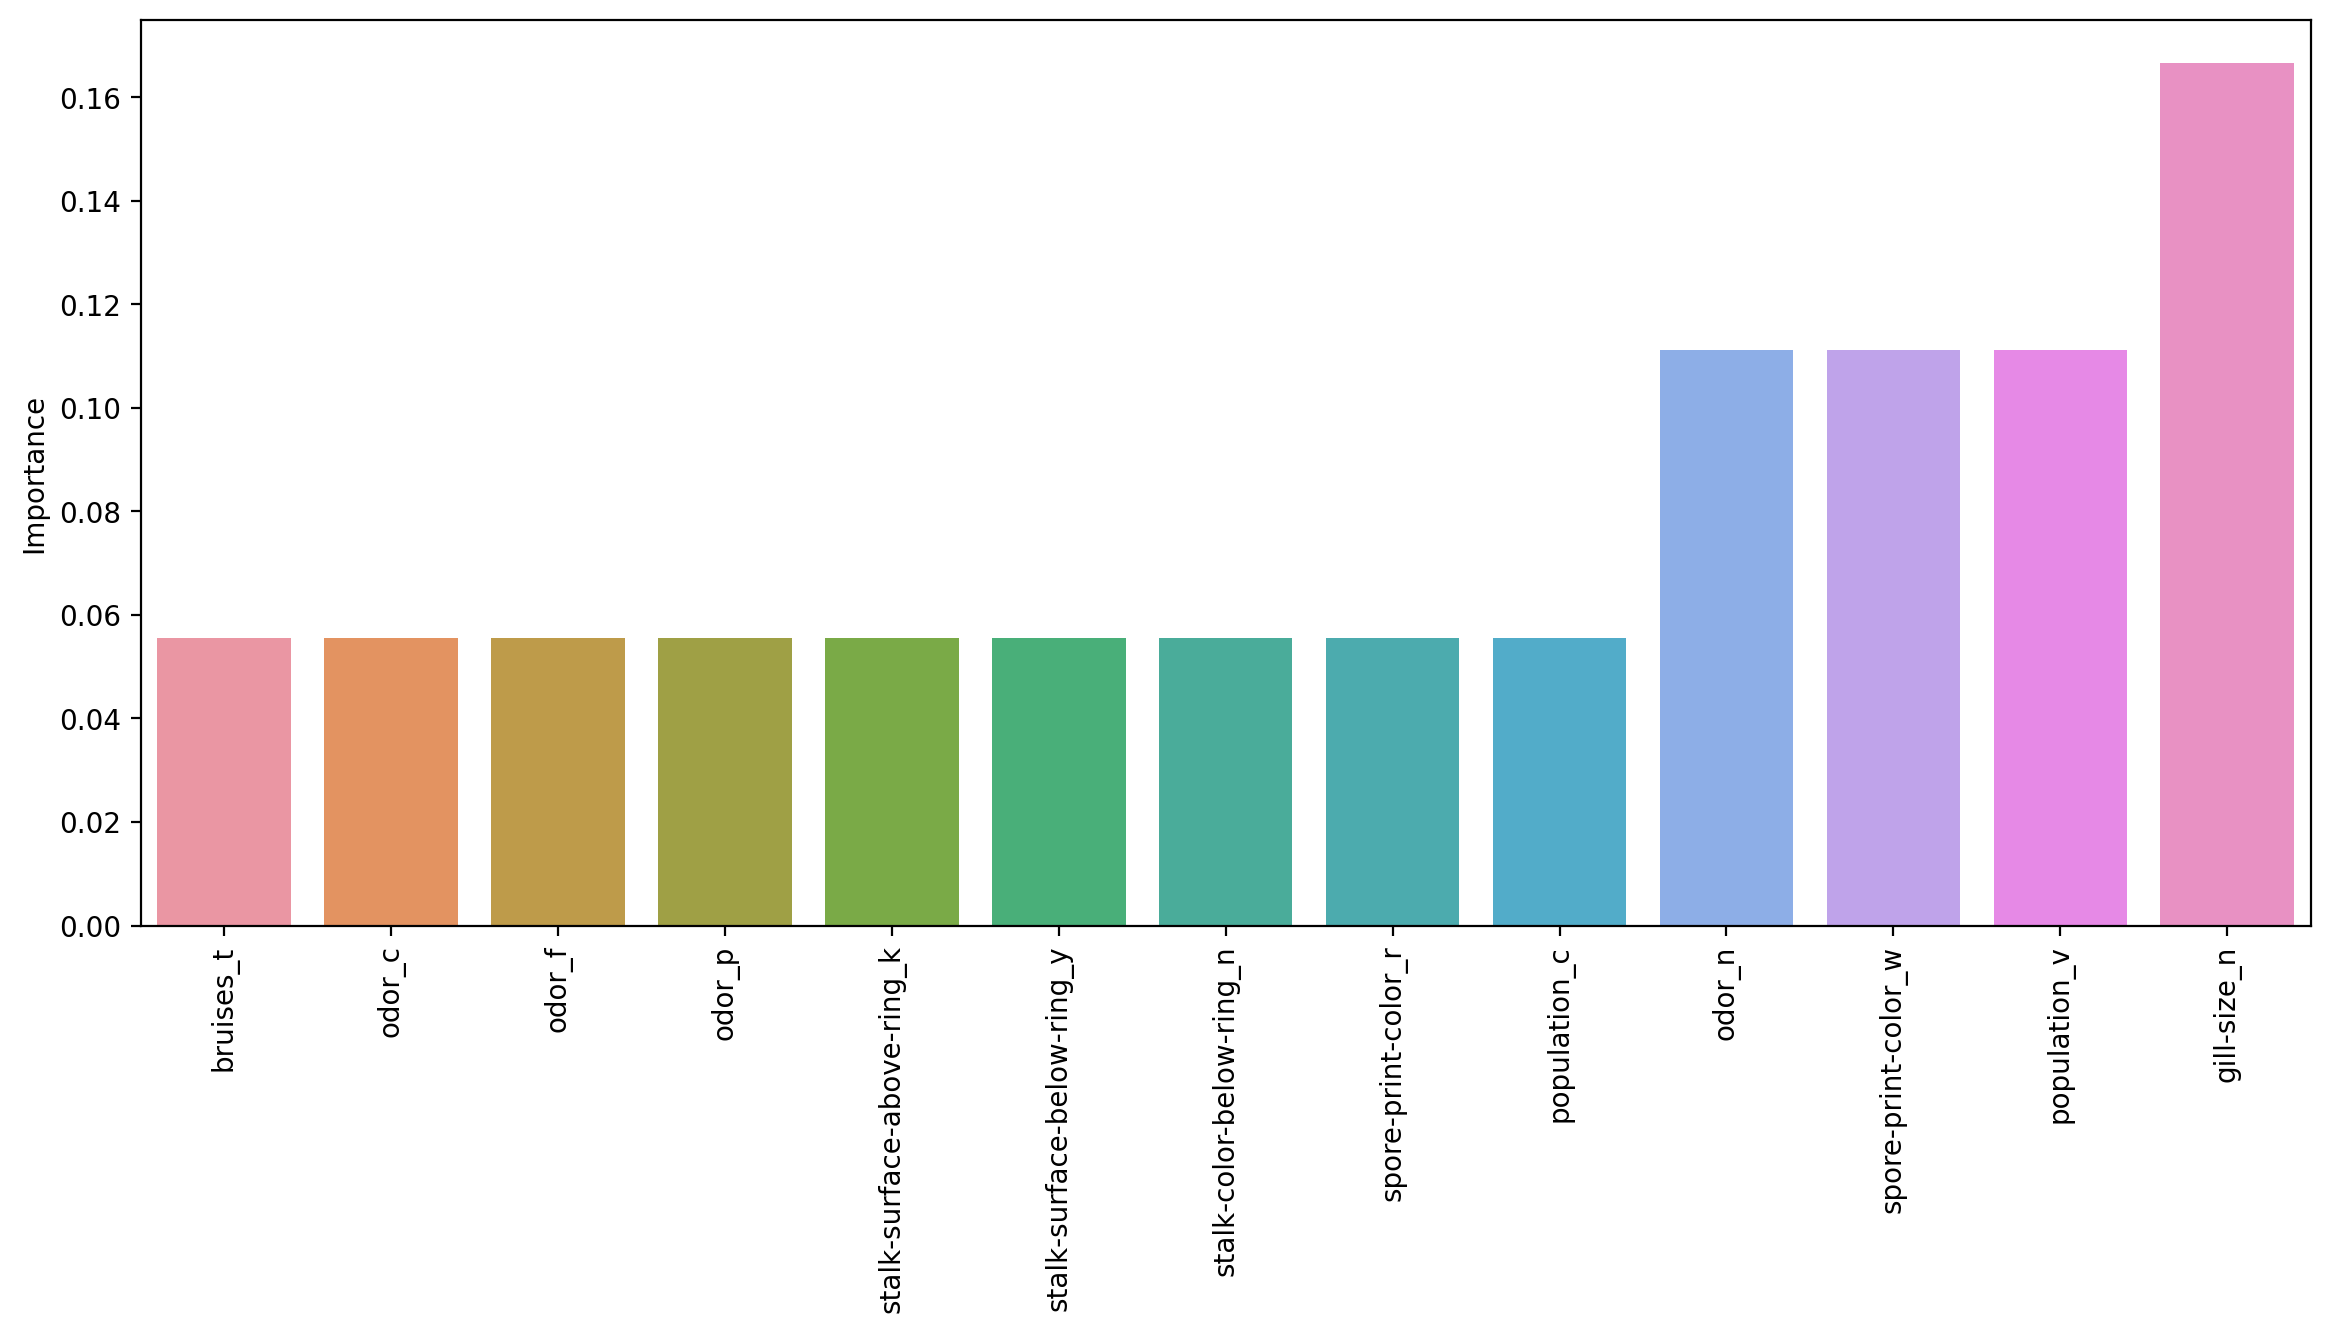

In [146]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);